In [7]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [1]:
#1. Import dataset and preprocess
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [2]:
from tensorflow.keras.utils import to_categorical
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
# Base model (conv + pool + FC + fc output layer)

from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

model = Sequential([
    Conv2D(64, 3, activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
trained_model_base = model.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_test, y_test))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               1081700   
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 1,083,350
Trainable params: 1,083,350
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15


2022-02-12 21:12:19.332268: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-02-12 21:12:19.350490: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2199995000 Hz
2022-02-12 21:12:19.777287: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-02-12 21:12:19.910221: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2022-02-12 21:12:20.456025: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2022-02-12 21:12:20.489160: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


938/938 [==============================] - 9s 8ms/step - loss: 3.1099 - accuracy: 0.8646 - val_loss: 0.1059 - val_accuracy: 0.9692
Epoch 2/15
938/938 [==============================] - 6s 6ms/step - loss: 0.0812 - accuracy: 0.9757 - val_loss: 0.1001 - val_accuracy: 0.9726
Epoch 3/15
938/938 [==============================] - 6s 6ms/step - loss: 0.0490 - accuracy: 0.9846 - val_loss: 0.0860 - val_accuracy: 0.9759
Epoch 4/15
938/938 [==============================] - 6s 6ms/step - loss: 0.0333 - accuracy: 0.9899 - val_loss: 0.0813 - val_accuracy: 0.9776
Epoch 5/15
938/938 [==============================] - 6s 6ms/step - loss: 0.0334 - accuracy: 0.9896 - val_loss: 0.0853 - val_accuracy: 0.9792
Epoch 6/15
938/938 [==============================] - 6s 6ms/step - loss: 0.0275 - accuracy: 0.9914 - val_loss: 0.1010 - val_accuracy: 0.9762
Epoch 7/15
938/938 [==============================] - 6s 6ms/step - loss: 0.0221 - accuracy: 0.9929 - val_loss: 0.0970 - val_accuracy: 0.9780
Epoch 8/15
938/93

In [11]:
from keras import regularizers

model = Sequential([
    Conv2D(64, 3, activation='relu', input_shape=(28, 28, 1), kernel_regularizer=regularizers.l2(0.00001)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.00001)),
    Dense(10, activation='softmax')
])

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
trained_model_base_l2 = model.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_test, y_test))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               1081700   
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 1,083,350
Trainable params: 1,083,350
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
938/938 [==============================] - 7s 7ms/step - loss: 3.4665 - accuracy: 0.8670 - val_loss

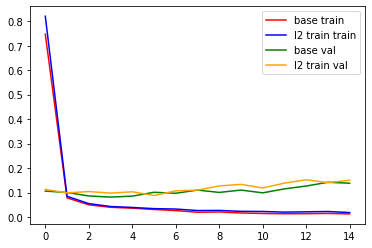

In [17]:
# Plot loss values(L2 vs base model)
import matplotlib.pyplot as plt

plt.figure()
plt.plot(trained_model_base.history['loss'], color='red', label='base train')
plt.plot(trained_model_base_l2.history['loss'], color='blue', label='l2 train train')

plt.plot(trained_model_base.history['val_loss'], color='green', label='base val')
plt.plot(trained_model_base_l2.history['val_loss'], color='orange', label='l2 train val')
plt.legend()

In [20]:
# Dropout
from tensorflow.python.keras.layers.core import Dropout

model = Sequential([
    Conv2D(64, 3, activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2,2)),
    Dropout(0.1),
    Flatten(),
    Dense(100, activation='relu',),
    Dropout(0.1),
    Dense(10, activation='softmax')
])

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
trained_model_dropout = model.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_test, y_test))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 100)               1081700   
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)               

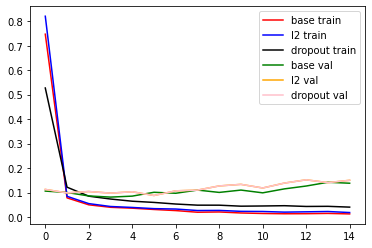

In [21]:
# Plot loss values(L2 vs base model)
import matplotlib.pyplot as plt

plt.figure()
plt.plot(trained_model_base.history['loss'], color='red', label='base train')
plt.plot(trained_model_base_l2.history['loss'], color='blue', label='l2 train')
plt.plot(trained_model_dropout.history['loss'], color='black', label='dropout train')

plt.plot(trained_model_base.history['val_loss'], color='green', label='base val')
plt.plot(trained_model_base_l2.history['val_loss'], color='orange', label='l2 val')
plt.plot(trained_model_base_l2.history['val_loss'], color='pink', label='dropout val')
plt.legend()

In [27]:
from tensorflow.python.keras.layers import BatchNormalization

In [28]:
# Dropout
from tensorflow.python.keras.layers.core import Dropout

model = Sequential([
    Conv2D(64, 3, activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(100, activation='relu',),
    BatchNormalization(),
    Dense(10, activation='softmax')
])

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
trained_model_BN = model.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_test, y_test))

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 64)        256       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 100)               1081700   
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dense_17 (Dense)             (None, 10)               

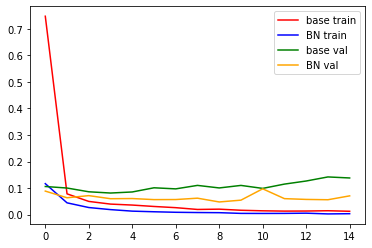

In [29]:
# Plot loss values(BN vs base model)
import matplotlib.pyplot as plt

plt.figure()
plt.plot(trained_model_base.history['loss'], color='red', label='base train')
plt.plot(trained_model_BN.history['loss'], color='blue', label='BN train')

plt.plot(trained_model_base.history['val_loss'], color='green', label='base val')
plt.plot(trained_model_BN.history['val_loss'], color='orange', label='BN val')
plt.legend()